In [2]:
import pandas as pd

# URL of the JSON data
json_url = "https://data.seattle.gov/resource/2bpz-gwpy.json"

# Read JSON data from the URL
df = pd.read_json(json_url)

# Print the first few rows of the dataset
print(df.head())


   osebuildingid  datayear    buildingtype primarypropertytype  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  propertyname          address     city state  zipcode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA    98101   
1              Paramount Hotel  724 Pine street  Seattle    WA    98101   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA    98101   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA    98101   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA    98121   

   taxparcelidentificationnumber  ...  defaultdata compliancestatus  \
0                      659000030  ...        False        Compliant   
1         

In [3]:
# Get an overview of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   1000 non-null   int64  
 1   datayear                        1000 non-null   int64  
 2   buildingtype                    1000 non-null   object 
 3   primarypropertytype             1000 non-null   object 
 4   propertyname                    1000 non-null   object 
 5   address                         1000 non-null   object 
 6   city                            1000 non-null   object 
 7   state                           1000 non-null   object 
 8   zipcode                         1000 non-null   int64  
 9   taxparcelidentificationnumber   1000 non-null   int64  
 10  councildistrictcode             1000 non-null   int64  
 11  neighborhood                    1000 non-null   object 
 12  latitude                        100

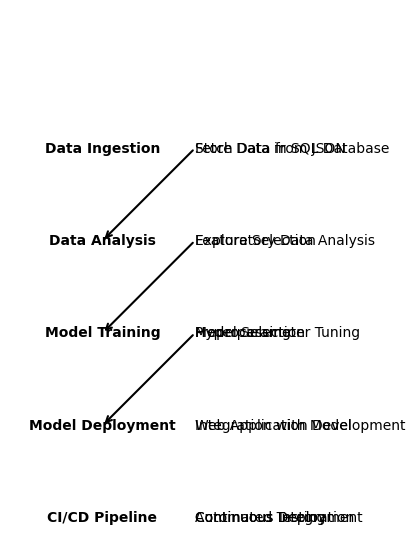

In [8]:
import matplotlib.pyplot as plt

# Define the components of your project
components = {
    'Data Ingestion': ['Fetch Data from JSON', 'Store Data in SQL Database'],
    'Data Analysis': ['Exploratory Data Analysis', 'Feature Selection'],
    'Model Training': ['Preprocessing', 'Model Selection', 'Hyperparameter Tuning'],
    'Model Deployment': ['Web Application Development', 'Integration with Model'],
    'CI/CD Pipeline': ['Continuous Integration', 'Automated Testing', 'Continuous Deployment']
}

# Define the connections between components
connections = [
    ('Data Ingestion', 'Data Analysis'),
    ('Data Analysis', 'Model Training'),
    ('Model Training', 'Model Deployment'),
    ('Model Deployment', 'CI/CD Pipeline')
]

# Create a figure and axes for the diagram
fig, ax = plt.subplots(figsize=(10, 6))

# Set the positions of components on the y-axis
y_positions = {component: -i for i, component in enumerate(components.keys())}

# Draw the components
for component, tasks in components.items():
    x_position = 0
    ax.text(x_position, y_positions[component], component, ha='center', va='center', fontweight='bold')

    for task in tasks:
        x_position = 1
        ax.text(x_position, y_positions[component], task, ha='left', va='center')

# Draw the connections between components
for source, target in connections:
    source_position = (1, y_positions[source])
    target_position = (0, y_positions[target])
    ax.annotate('', xytext=source_position, xy=target_position,
                arrowprops=dict(arrowstyle='->', linewidth=1.5))

# Set the limits and aspect ratio of the axes
ax.set_xlim(-1, 2)
ax.set_ylim(-len(components) + 1.5, 1.5)
ax.set_aspect('equal')

# Remove the axis ticks and labels
ax.axis('off')

# Show the diagram
plt.show()


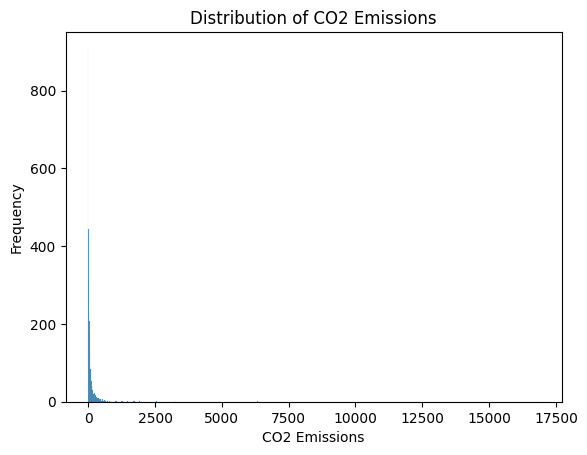

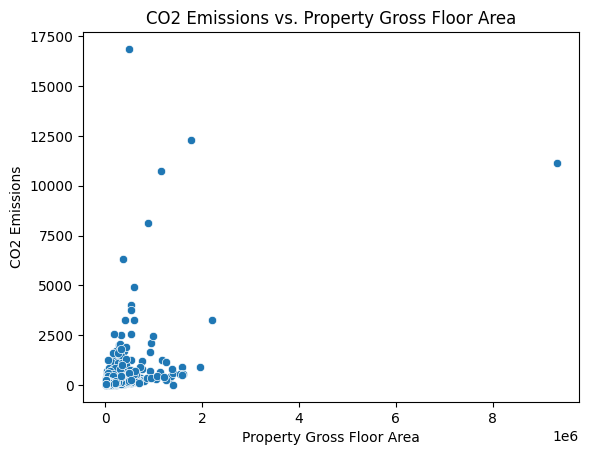

<ipython-input-9-652b8f18db3d>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


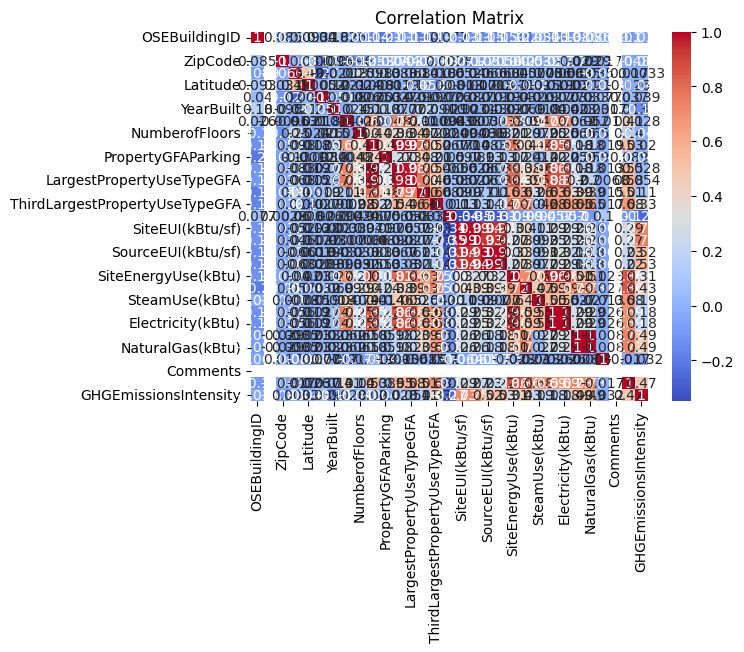

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
df = pd.read_csv('/content/2016_Building_Energy_Benchmarking.csv')

# Perform exploratory data analysis (EDA)
# Example EDA steps:
# 1. Check the distribution of CO2 emissions
sns.histplot(df['TotalGHGEmissions'])
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions')
plt.ylabel('Frequency')
plt.show()

# 2. Explore the relationship between CO2 emissions and other variables
sns.scatterplot(x='PropertyGFATotal', y='TotalGHGEmissions', data=df)
plt.title('CO2 Emissions vs. Property Gross Floor Area')
plt.xlabel('Property Gross Floor Area')
plt.ylabel('CO2 Emissions')
plt.show()

# 3. Calculate correlations between variables
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature selection
# Example feature selection steps:
# 1. Drop irrelevant columns or columns with high missing values
df_clean = df.drop(['Address', 'City', 'State', 'ZipCode'], axis=1)

# 2. Handle missing values
df_clean = df_clean.dropna()

# 3. Select relevant features based on domain knowledge and correlation analysis
selected_features = ['PropertyGFATotal', 'YearBuilt', 'NumberofBuildings', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions']

# Subset the DataFrame with selected features
df_selected = df_clean[selected_features]

# Make recommendations based on the analysis
# Example recommendation:
# Based on the correlation analysis, it is observed that the property gross floor area (PropertyGFATotal) and the year the building was built (YearBuilt) have a significant impact on CO2 emissions (TotalGHGEmissions). It is recommended to focus on retrofitting older buildings with energy-efficient technologies and improving energy management practices in buildings with larger floor areas.


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# Read the dataset into a DataFrame
df = pd.read_csv('/content/2016_Building_Energy_Benchmarking.csv')

# Feature selection (assuming you have performed feature selection in the previous step)
selected_features = ['PropertyGFATotal', 'YearBuilt', 'NumberofBuildings', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions']
df_selected = df[selected_features]

# Handle missing values using mean imputation
imputed_df = df_selected.dropna()

# Split the data into training and testing sets
X = imputed_df.drop('TotalGHGEmissions', axis=1)
y = imputed_df['TotalGHGEmissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing steps and model
pipeline = make_pipeline(
    StandardScaler(),
    PowerTransformer(),
    RandomForestRegressor(random_state=42)
)

# Define hyperparameters for tuning
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 5, 10],
}

# Perform grid search to find the best model
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


Mean Squared Error: 55967.94259642786
R-squared Score: 0.8185919988427933


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Read the dataset into a DataFrame
df = pd.read_csv('/content/2016_Building_Energy_Benchmarking.csv')

# Feature selection (assuming you have performed feature selection in the previous step)
selected_features = ['PropertyGFATotal', 'YearBuilt', 'NumberofBuildings', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions']
df_selected = df[selected_features]

# Handle missing values using mean imputation
imputed_df = df_selected.dropna()

# Split the data into training and testing sets
X = imputed_df.drop('TotalGHGEmissions', axis=1)
y = imputed_df['TotalGHGEmissions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing steps and model
pipeline = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

# Define hyperparameters for tuning
param_grid = {
    'randomforestregressor__n_estimators': [100, 200, 300],
    'randomforestregressor__max_depth': [None, 5, 10],
    'randomforestregressor__min_samples_split': [2, 4, 8],
    'randomforestregressor__min_samples_leaf': [1, 2, 4],
    'randomforestregressor__max_features': ['auto', 'sqrt', 'log2'],
}

# Perform randomized search to find the best model
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Get the best model from the randomized search
best_model = random_search.best_estimator_

# Make predictions on the testing set
y_pred = best_model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print('R-squared Score:', r2)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

R-squared Score: 0.8589748533253179


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the new dataset
df_new = pd.read_csv('/content/Test2_Building_Energy_Benchmarking.csv', sep=";")



In [21]:
df_new.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,66,2016,NonResidential,Hotel,Moore Hotel INC,1926 2nd Ave,Seattle,WA,98101,1977201035,...,3.791211e+05,1293561,41077.160160,4107716,False,NaN,Compliant,NaN,227.18,1.85
1,117,2016,NonResidential,Hotel,UNIVERSITY INN,4140 ROOSEVELT WAY NE,Seattle,WA,98105,1142001871,...,6.237707e+05,2128306,33206.691410,3320669,False,NaN,Compliant,NaN,191.20,3.82
2,377,2016,NonResidential,Large Office,Fifth and Wall LLC,521 Wall Street,Seattle,WA,98121,697000064,...,1.515135e+06,5169641,1881.909668,188191,False,NaN,Compliant,NaN,46.03,0.24
3,414,2016,NonResidential,Large Office,Onni 1411 Fourth Development LP,1411 4TH AVE,Seattle,WA,98101,1975700345,...,7.610041e+05,2596546,0.000000,0,False,NaN,Compliant,NaN,238.09,1.58
4,522,2016,NonResidential,Small- and Mid-Sized Office,The Waterside Building,651 N 34th St,Seattle,WA,98103,1973200353,...,1.586582e+06,5413417,0.000000,0,False,NaN,Compliant,NaN,37.74,0.39


In [22]:
# Apply the same preprocessing steps as the training data
selected_features = ['PropertyGFATotal', 'YearBuilt', 'NumberofBuildings', 'SiteEUI(kBtu/sf)']
df_new_selected = df_new[selected_features]

# Handle missing values using mean imputation (if applicable)
df_new_selected = df_new_selected.fillna(df_new_selected.mean())




In [23]:
df_new_selected.head()

,PropertyGFATotal,YearBuilt,NumberofBuildings,SiteEUI(kBtu/sf)
0,122810,1908,1,44.000000
1,50017,1962,2,108.900002
2,192630,1947,1,36.700001
3,151039,1929,1,43.400002
4,96041,2001,1,87.000000


In [25]:

# Load the trained model
model = best_model

# Load the scaler object used during training
scaler = StandardScaler()
scaler.fit(X_train)

# Perform the same feature scaling on the new data
X_new_scaled = scaler.transform(df_new_selected)

# Make predictions on the new data
y_pred_new = model.predict(X_new_scaled)
# Print the predictions
print(y_pred_new)

[1.85121643 1.86016643 1.85121643 1.85121643 1.85536643 1.85536643
 1.85121643 1.85121643 1.85226643 1.85226643 1.89480167 2.28289008
 1.86016643 1.96857786]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
